In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (맑은고딕 or 나눔고딕)
plt.rc('font', family='Malgun Gothic')  # Windows (맑은고딕)
# plt.rc('font', family='NanumGothic')  # Mac/Linux (나눔고딕 필요 시 사용)

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 모든 열을 출력할 수 있도록 설정
pd.set_option("display.max_columns", None)

# 저장된 피클 파일 불러오기
pkl_data = "dataset0222.pkl"
df_data = pd.read_pickle(pkl_data)

print(df_data.shape[0])
# 계약연도 컬럼 생성
df_data["계약연도"] = pd.to_datetime(df_data["계약일"]).dt.year


515083


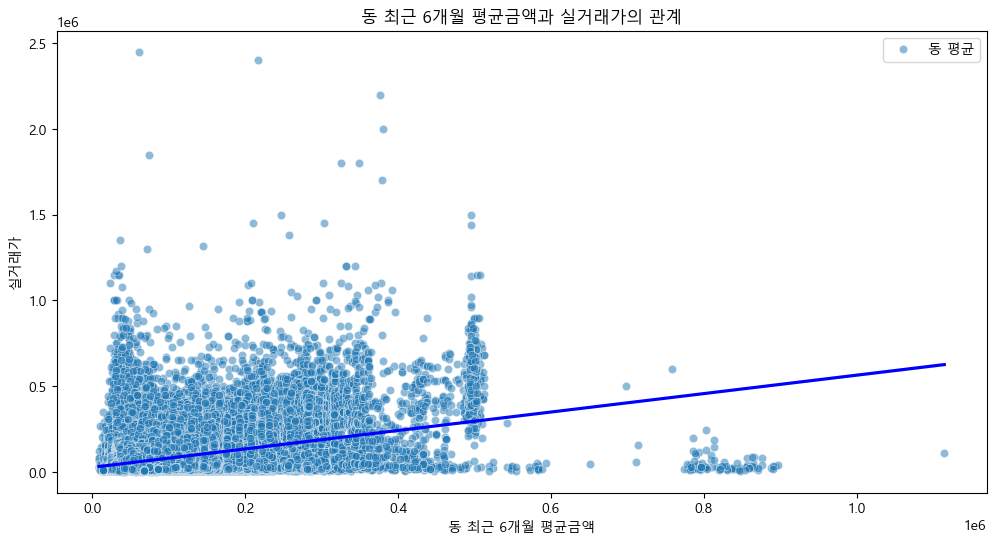

In [2]:
# "동 최근 6개월 평균금액"과 "실거래가" 간의 관계를 시각화할 수 있습니다.
def plot_price_vs_dong_avg(df):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='동최근6개월평균금액', y='실거래가', alpha=0.5, label='동 평균')
    sns.regplot(data=df, x='동최근6개월평균금액', y='실거래가', scatter=False, color='blue')
    
    plt.title('동 최근 6개월 평균금액과 실거래가의 관계')
    plt.xlabel('동 최근 6개월 평균금액')
    plt.ylabel('실거래가')
    plt.legend()
    plt.show()
plot_price_vs_dong_avg(df_data)

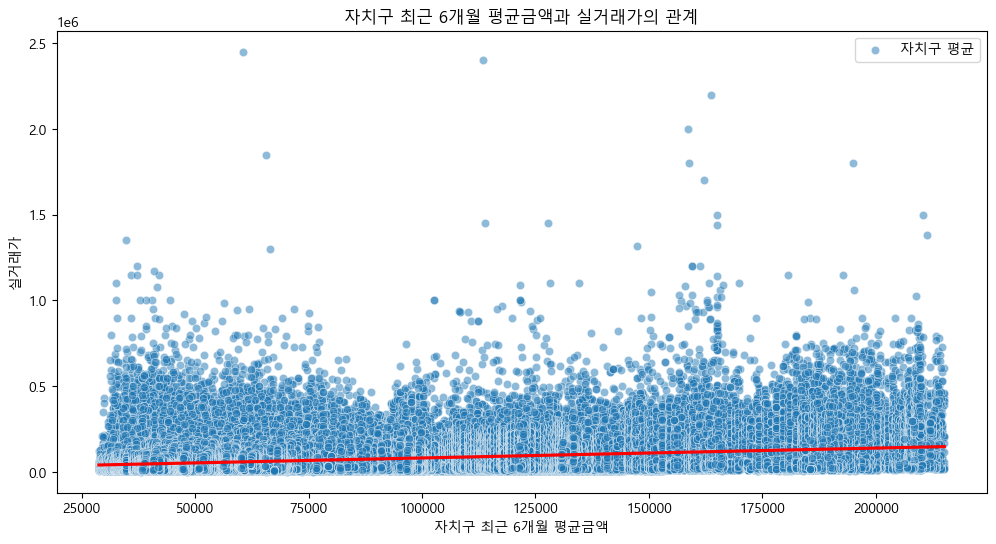

In [3]:
# 자치구 최근 6개월 평균금액과 실거래가간의 관계를 시각화할 수 있습니다.
def plot_price_vs_gu_avg(df):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='자치구최근6개월평균금액', y='실거래가', alpha=0.5, label='자치구 평균')
    sns.regplot(data=df, x='자치구최근6개월평균금액', y='실거래가', scatter=False, color='red')
    
    plt.title('자치구 최근 6개월 평균금액과 실거래가의 관계')
    plt.xlabel('자치구 최근 6개월 평균금액')
    plt.ylabel('실거래가')
    plt.legend()
    plt.show()
plot_price_vs_gu_avg(df_data)

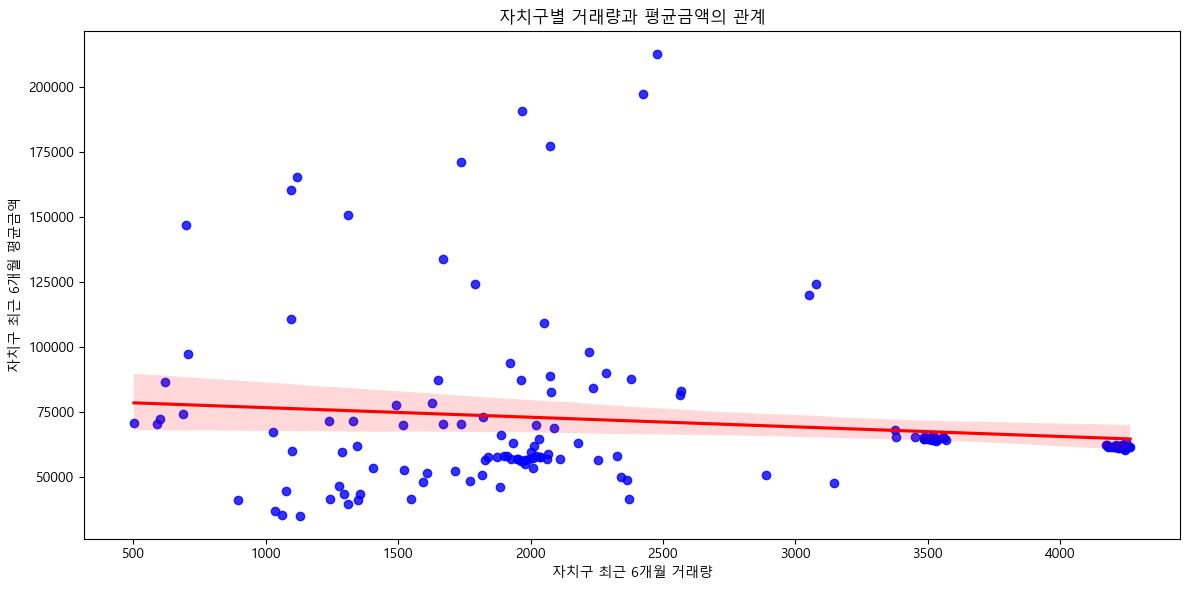

In [4]:
# 필요한 컬럼만 추출하여 월별 거래량과 평균금액을 집계
df = df_data.groupby(['계약연도', '자치구명'])[['자치구최근6개월거래량', '자치구최근6개월평균금액']].mean().reset_index()

# 월별로 그룹화하여 거래량과 평균금액 확인
df['월'] = df['계약연도'].astype(str)  # 연도와 월을 합친 열 추가
df['월'] = df['월'].apply(lambda x: f"{x}-01")  # 월별 단위로 그룹화

# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# 산점도 그래프
sns.regplot(x='자치구최근6개월거래량', y='자치구최근6개월평균금액', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# 제목 및 레이블 설정
plt.title('자치구별 거래량과 평균금액의 관계')
plt.xlabel('자치구 최근 6개월 거래량')
plt.ylabel('자치구 최근 6개월 평균금액')

# 그래프 출력
plt.tight_layout()
plt.show()


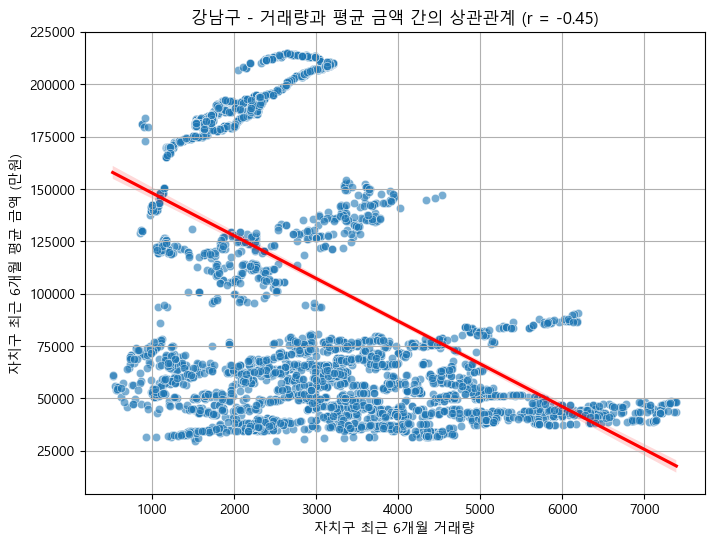

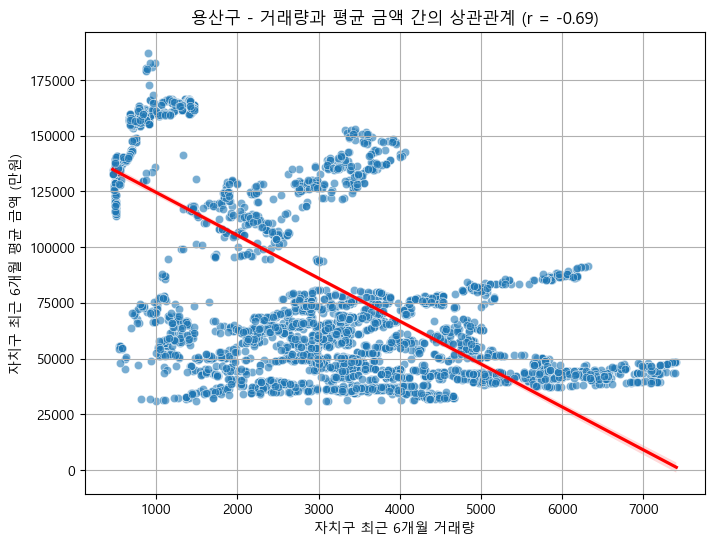

In [7]:
# 자치구별로 산점도를 보여주는 함수
def plot_correlation_by_district(df, district_name, sample_size=5000):
    """
    특정 자치구의 최근 6개월 거래량과 평균 금액 간의 상관관계를 산점도 및 회귀선으로 시각화하는 함수

    Parameters:
    df (DataFrame): 분석할 데이터프레임 (자치구최근6개월거래량, 자치구최근6개월평균금액 포함)
    district_name (str): 보고 싶은 자치구명
    sample_size (int): 샘플링할 데이터 개수 (기본값: 5000)

    Returns:
    None (그래프 출력)
    """
    # 특정 자치구 데이터 선택 및 NaN 제거
    df_district = df[df['자치구명'] == district_name][['자치구최근6개월거래량', '자치구최근6개월평균금액']].dropna()
    
    # 데이터가 없을 경우 출력 후 종료
    if df_district.empty:
        print(f"'{district_name}'에 대한 데이터가 없습니다.")
        return
    
    # 샘플링 (데이터 개수가 sample_size보다 적으면 전체 사용)
    df_sample = df_district.sample(n=min(sample_size, len(df_district)), random_state=42)

    # 상관관계 계산
    correlation = df_district.corr().iloc[0, 1]

    # 산점도 및 회귀선 시각화
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_sample['자치구최근6개월거래량'], y=df_sample['자치구최근6개월평균금액'], alpha=0.6)
    sns.regplot(x=df_sample['자치구최근6개월거래량'], y=df_sample['자치구최근6개월평균금액'], scatter=False, color="red")

    # 제목 및 축 레이블 설정
    plt.title(f'{district_name} - 거래량과 평균 금액 간의 상관관계 (r = {correlation:.2f})')
    plt.xlabel('자치구 최근 6개월 거래량')
    plt.ylabel('자치구 최근 6개월 평균 금액 (만원)')
    plt.grid(True)

    # 그래프 출력
    plt.show()

# 예제 실행 (예: 강남구)
plot_correlation_by_district(df_data, "강남구")
plot_correlation_by_district(df_data, "용산구")


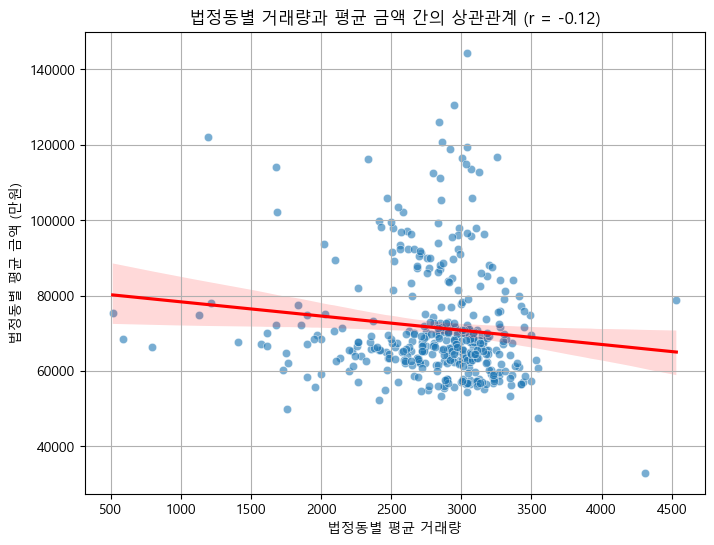

In [8]:
import numpy as np

# 자치구명+법정동별 평균 거래량 및 평균 금액 계산
df_town_stats = df_data.groupby(['자치구명', '법정동명']).agg(
    평균_거래량=('자치구최근6개월거래량', 'mean'),
    평균_금액=('자치구최근6개월평균금액', 'mean')
).dropna().reset_index()

# 상관관계 계산
correlation = np.corrcoef(df_town_stats['평균_거래량'], df_town_stats['평균_금액'])[0, 1]

# 산점도 및 회귀선 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_town_stats['평균_거래량'], y=df_town_stats['평균_금액'], alpha=0.6)
sns.regplot(x=df_town_stats['평균_거래량'], y=df_town_stats['평균_금액'], scatter=False, color="red")

# 제목 및 축 레이블 설정
plt.title(f'법정동별 거래량과 평균 금액 간의 상관관계 (r = {correlation:.2f})')
plt.xlabel('법정동별 평균 거래량')
plt.ylabel('법정동별 평균 금액 (만원)')
plt.grid(True)

# 그래프 출력
plt.show()


<!-- 상관계수 (r = -0.12) 해석

r = -0.12 → 거의 상관관계 없음 (매우 약한 음의 상관관계)
즉, 법정동별 거래량이 많다고 해서 평균 금액이 낮아지는 경향이 뚜렷하지 않음.
사실상 거래량과 평균 금액 사이에는 유의미한 관계가 거의 없다고 볼 수 있어.
 -->

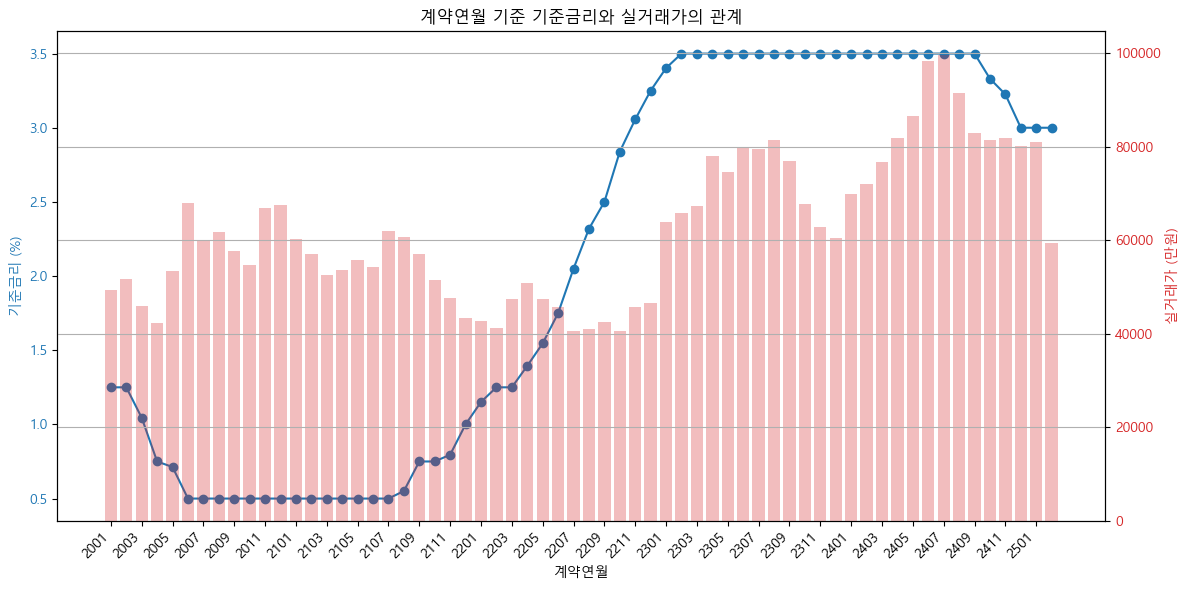

In [10]:
import matplotlib.pyplot as plt

# 필요한 데이터 선택 (계약연월, 기준금리, 실거래가)
df_filtered = df_data[['계약연월', '기준금리', '실거래가']].dropna()

# 계약연월을 기준으로 그룹화하여 평균값 계산
df = df_filtered.groupby('계약연월').mean().reset_index()

# 그래프 크기 설정
fig, ax1 = plt.subplots(figsize=(12, 6))

# x축 계약연월을 unique한 값으로 설정하고, 형식 변경
x_labels = df['계약연월'].astype(str).apply(lambda x: x[2:])  # '202502' -> '2502'

# 기준금리 변화 (선 그래프)
ax1.set_xlabel('계약연월')
ax1.set_ylabel('기준금리 (%)', color='tab:blue')
ax1.plot(x_labels, df['기준금리'], color='tab:blue', marker='o', label='기준금리')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 실거래가 변화 (막대 그래프)
ax2 = ax1.twinx()  # 같은 x축을 공유하는 두 번째 y축
ax2.set_ylabel('실거래가 (만원)', color='tab:red')
ax2.bar(x_labels, df['실거래가'], color='tab:red', alpha=0.3, label='실거래가')
ax2.tick_params(axis='y', labelcolor='tab:red')

# x축 레이블 간격 조정 (예: 3개의 레이블마다 하나만 표시)
step = 2  # 간격 설정
filtered_x_labels = x_labels[::step]  # x_labels 간격에 맞게 필터링
ax1.set_xticks(x_labels[::step])  # 간격에 맞는 x축 위치 설정
ax1.set_xticklabels(filtered_x_labels, rotation=45, ha='right')  # 레이블 회전

# 제목 및 레이아웃 조정
plt.title('계약연월 기준 기준금리와 실거래가의 관계')
fig.tight_layout()

# 그리드 설정
plt.grid(True)

# 그래프 출력
plt.show()


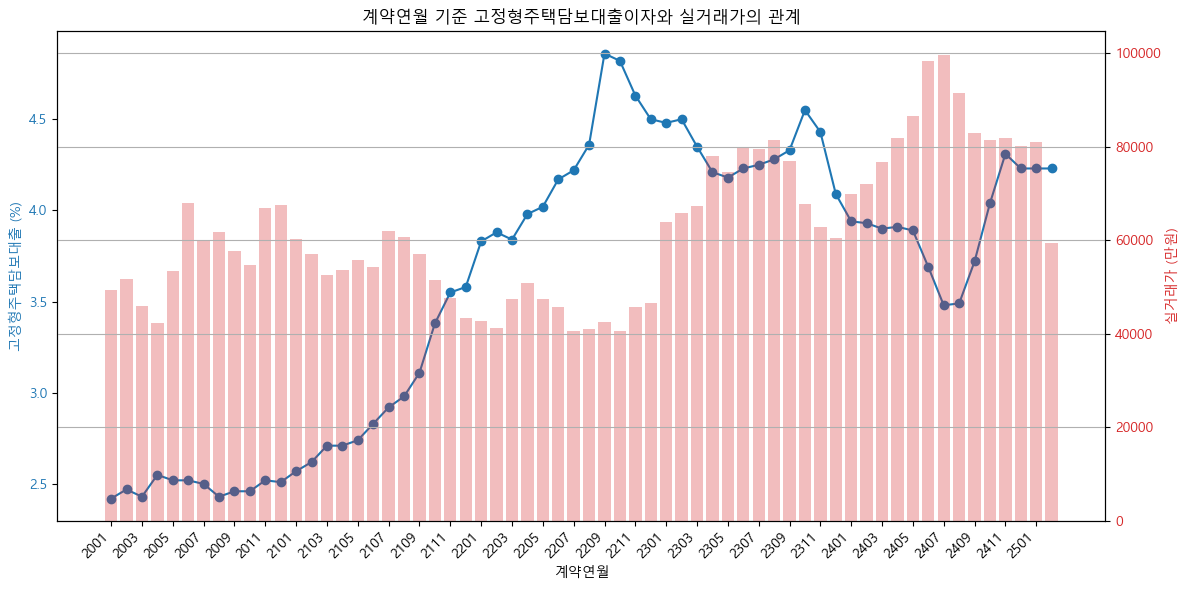

In [11]:
import matplotlib.pyplot as plt

# 필요한 데이터 선택 (계약연월, 기준금리, 실거래가)
df_filtered = df_data[['계약연월', '고정형주택담보대출', '실거래가']].dropna()

# 계약연월을 기준으로 그룹화하여 평균값 계산
df = df_filtered.groupby('계약연월').mean().reset_index()

# 그래프 크기 설정
fig, ax1 = plt.subplots(figsize=(12, 6))

# x축 계약연월을 unique한 값으로 설정하고, 형식 변경
x_labels = df['계약연월'].astype(str).apply(lambda x: x[2:])  # '202502' -> '2502'

# 기준금리 변화 (선 그래프)
ax1.set_xlabel('계약연월')
ax1.set_ylabel('고정형주택담보대출 (%)', color='tab:blue')
ax1.plot(x_labels, df['고정형주택담보대출'], color='tab:blue', marker='o', label='고정형주택담보대출')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 실거래가 변화 (막대 그래프)
ax2 = ax1.twinx()  # 같은 x축을 공유하는 두 번째 y축
ax2.set_ylabel('실거래가 (만원)', color='tab:red')
ax2.bar(x_labels, df['실거래가'], color='tab:red', alpha=0.3, label='실거래가')
ax2.tick_params(axis='y', labelcolor='tab:red')

# x축 레이블 간격 조정 (예: 3개의 레이블마다 하나만 표시)
step = 2  # 간격 설정
filtered_x_labels = x_labels[::step]  # x_labels 간격에 맞게 필터링
ax1.set_xticks(x_labels[::step])  # 간격에 맞는 x축 위치 설정
ax1.set_xticklabels(filtered_x_labels, rotation=45, ha='right')  # 레이블 회전

# 제목 및 레이아웃 조정
plt.title('계약연월 기준 고정형주택담보대출이자와 실거래가의 관계')
fig.tight_layout()

# 그리드 설정
plt.grid(True)

# 그래프 출력
plt.show()


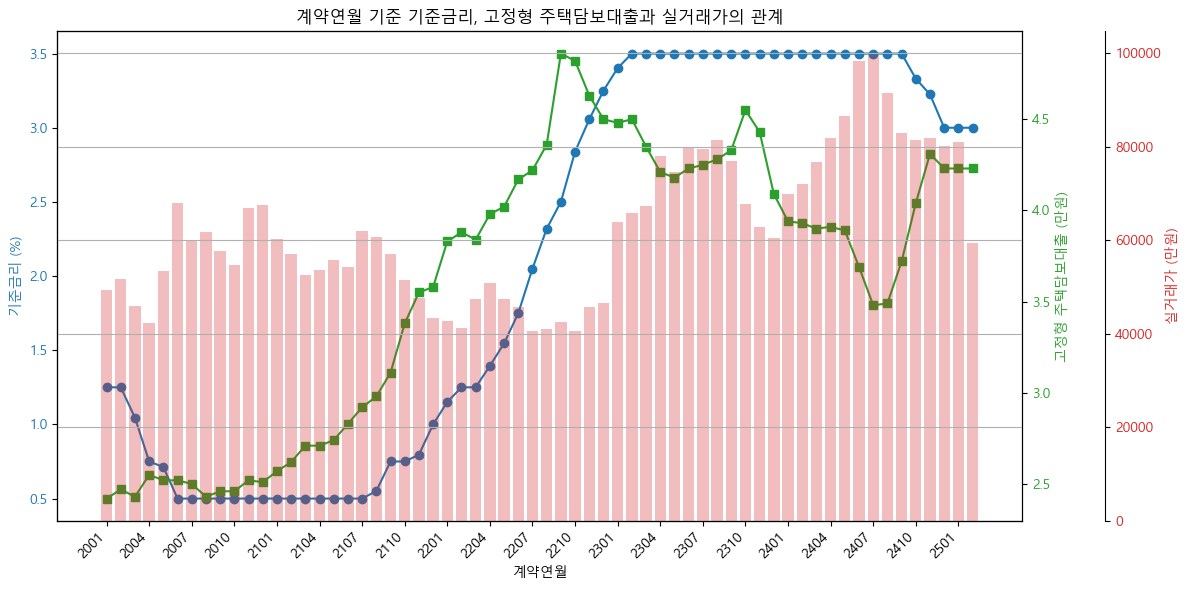

In [12]:
import matplotlib.pyplot as plt

# 필요한 데이터 선택 (계약연월, 기준금리, 고정형주택담보대출, 실거래가)
df_filtered = df_data[['계약연월', '기준금리', '고정형주택담보대출', '실거래가']].dropna()

# 계약연월을 기준으로 그룹화하여 평균값 계산
df = df_filtered.groupby('계약연월').mean().reset_index()

# 그래프 크기 설정
fig, ax1 = plt.subplots(figsize=(12, 6))

# x축 계약연월을 unique한 값으로 설정하고, 형식 변경
x_labels = df['계약연월'].astype(str).apply(lambda x: x[2:])  # '202502' -> '2502'

# 기준금리 변화 (선 그래프)
ax1.set_xlabel('계약연월')
ax1.set_ylabel('기준금리 (%)', color='tab:blue')
ax1.plot(x_labels, df['기준금리'], color='tab:blue', marker='o', label='기준금리')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 고정형 주택담보대출 변화 (선 그래프)
ax2 = ax1.twinx()  # 같은 x축을 공유하는 두 번째 y축
ax2.set_ylabel('고정형 주택담보대출 (만원)', color='tab:green')
ax2.plot(x_labels, df['고정형주택담보대출'], color='tab:green', marker='s', label='고정형 주택담보대출')
ax2.tick_params(axis='y', labelcolor='tab:green')

# 실거래가 변화 (막대 그래프)
ax3 = ax1.twinx()  # 세 번째 y축
ax3.spines['right'].set_position(('outward', 60))  # 세 번째 y축의 위치 조정
ax3.set_ylabel('실거래가 (만원)', color='tab:red')
ax3.bar(x_labels, df['실거래가'], color='tab:red', alpha=0.3, label='실거래가')
ax3.tick_params(axis='y', labelcolor='tab:red')

# x축 레이블 간격 조정 (예: 3개의 레이블마다 하나만 표시)
step = 3  # 간격 설정
filtered_x_labels = x_labels[::step]  # x_labels 간격에 맞게 필터링
ax1.set_xticks(x_labels[::step])  # 간격에 맞는 x축 위치 설정
ax1.set_xticklabels(filtered_x_labels, rotation=45, ha='right')  # 레이블 회전

# 제목 및 레이아웃 조정
plt.title('계약연월 기준 기준금리, 고정형 주택담보대출과 실거래가의 관계')
fig.tight_layout()

# 그리드 설정
plt.grid(True)

# 그래프 출력
plt.show()


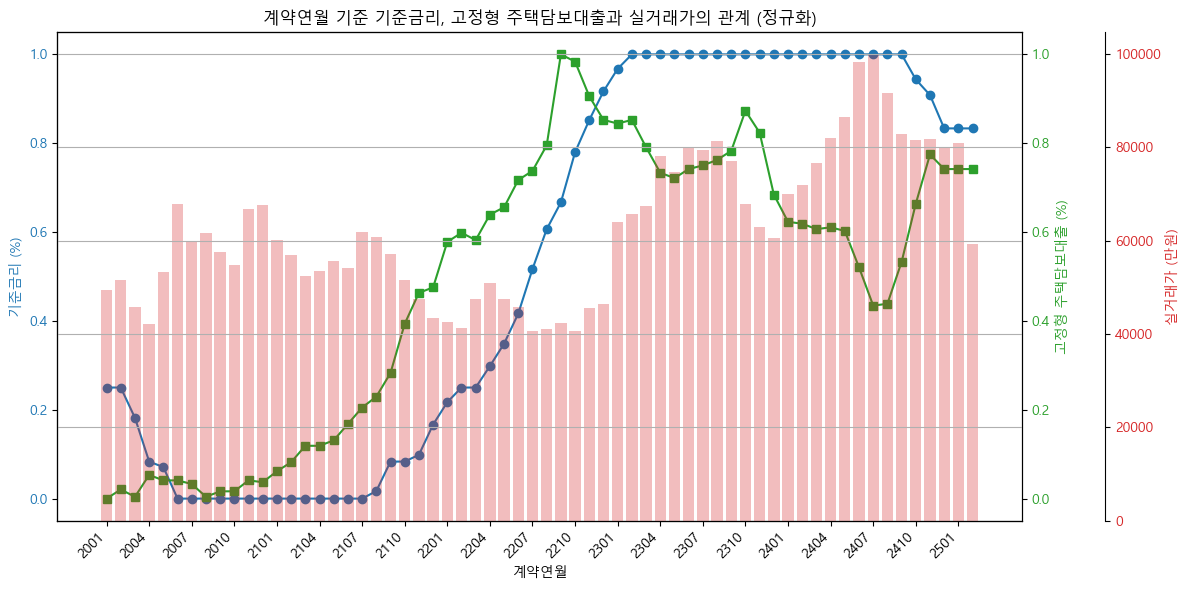

In [13]:
import matplotlib.pyplot as plt

# 필요한 데이터 선택 (계약연월, 기준금리, 고정형주택담보대출, 실거래가)
df_filtered = df_data[['계약연월', '기준금리', '고정형주택담보대출', '실거래가']].dropna()

# 계약연월을 기준으로 그룹화하여 평균값 계산
df = df_filtered.groupby('계약연월').mean().reset_index()

# 기준금리와 고정형 주택담보대출을 0-1 비율로 정규화
df['기준금리_정규화'] = (df['기준금리'] - df['기준금리'].min()) / (df['기준금리'].max() - df['기준금리'].min())
df['고정형주택담보대출_정규화'] = (df['고정형주택담보대출'] - df['고정형주택담보대출'].min()) / (df['고정형주택담보대출'].max() - df['고정형주택담보대출'].min())

# 그래프 크기 설정
fig, ax1 = plt.subplots(figsize=(12, 6))

# x축 계약연월을 unique한 값으로 설정하고, 형식 변경
x_labels = df['계약연월'].astype(str).apply(lambda x: x[2:])  # '202502' -> '2502'

# 기준금리 변화 (선 그래프)
ax1.set_xlabel('계약연월')
ax1.set_ylabel('기준금리 (%)', color='tab:blue')
ax1.plot(x_labels, df['기준금리_정규화'], color='tab:blue', marker='o', label='기준금리')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 고정형 주택담보대출 변화 (선 그래프)
ax2 = ax1.twinx()  # 같은 x축을 공유하는 두 번째 y축
ax2.set_ylabel('고정형 주택담보대출 (%)', color='tab:green')
ax2.plot(x_labels, df['고정형주택담보대출_정규화'], color='tab:green', marker='s', label='고정형 주택담보대출')
ax2.tick_params(axis='y', labelcolor='tab:green')

# 실거래가 변화 (막대 그래프)
ax3 = ax1.twinx()  # 세 번째 y축
ax3.spines['right'].set_position(('outward', 60))  # 세 번째 y축의 위치 조정
ax3.set_ylabel('실거래가 (만원)', color='tab:red')
ax3.bar(x_labels, df['실거래가'], color='tab:red', alpha=0.3, label='실거래가')
ax3.tick_params(axis='y', labelcolor='tab:red')

# x축 레이블 간격 조정 (예: 3개의 레이블마다 하나만 표시)
step = 3  # 간격 설정
filtered_x_labels = x_labels[::step]  # x_labels 간격에 맞게 필터링
ax1.set_xticks(x_labels[::step])  # 간격에 맞는 x축 위치 설정
ax1.set_xticklabels(filtered_x_labels, rotation=45, ha='right')  # 레이블 회전

# 제목 및 레이아웃 조정
plt.title('계약연월 기준 기준금리, 고정형 주택담보대출과 실거래가의 관계 (정규화)')
fig.tight_layout()

# 그리드 설정
plt.grid(True)

# 그래프 출력
plt.show()


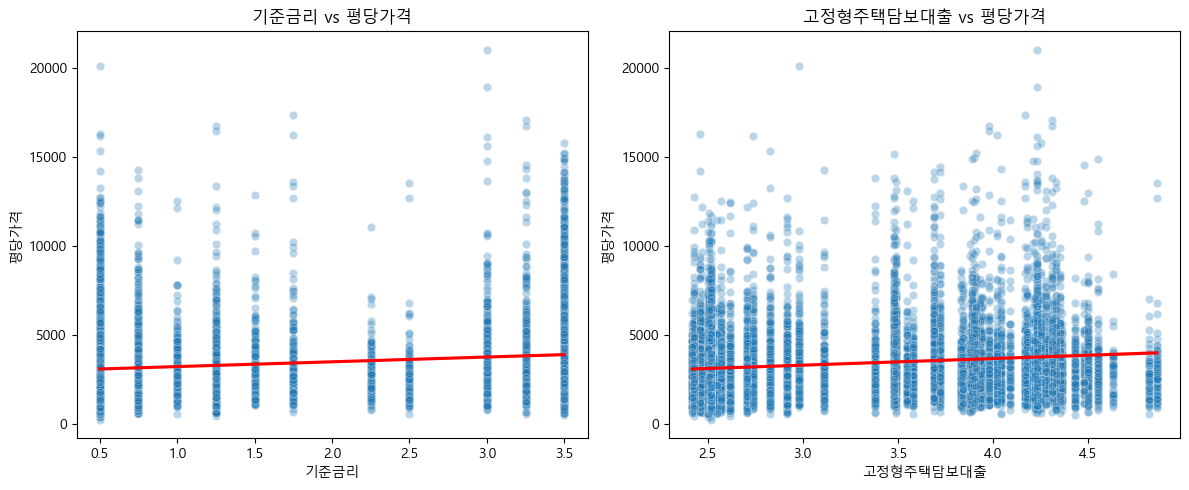

In [15]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 시각화 함수 (실거래가 제외, 평당가격만 시각화)
def visualize_interest_rate_effects_optimized(df, sample_size=10000):
    """
    기준금리 및 고정형 주택담보대출 이자가 평당가격에 미치는 영향을 시각화하는 함수
    (샘플링 적용하여 실행 속도 개선, 실거래가는 제외)

    Parameters:
    df (DataFrame): 분석할 데이터프레임 (기준금리, 고정형주택담보대출, 평당가격 포함)
    sample_size (int): 샘플링할 데이터 개수 (기본값: 10000)

    Returns:
    None (그래프 출력)
    """
    # NaN 값 제거
    df_filtered = df.dropna(subset=['기준금리', '고정형주택담보대출', '평당가격'])

    # 데이터 크기가 너무 크면 샘플링 적용
    df_sample = df_filtered.sample(n=min(sample_size, len(df_filtered)), random_state=42)

    # 상관관계 분석
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # 기준금리 vs 평당가격
    sns.scatterplot(x=df_sample['기준금리'], y=df_sample['평당가격'], alpha=0.3, ax=axes[0])
    sns.regplot(x=df_sample['기준금리'], y=df_sample['평당가격'], scatter=False, color="red", ax=axes[0])
    axes[0].set_title('기준금리 vs 평당가격')

    # 고정형주택담보대출 vs 평당가격
    sns.scatterplot(x=df_sample['고정형주택담보대출'], y=df_sample['평당가격'], alpha=0.3, ax=axes[1])
    sns.regplot(x=df_sample['고정형주택담보대출'], y=df_sample['평당가격'], scatter=False, color="red", ax=axes[1])
    axes[1].set_title('고정형주택담보대출 vs 평당가격')

    plt.tight_layout()
    plt.show()


# ✅ 최적화된 함수 실행 (샘플링 적용)
visualize_interest_rate_effects_optimized(df_data, sample_size=10000)


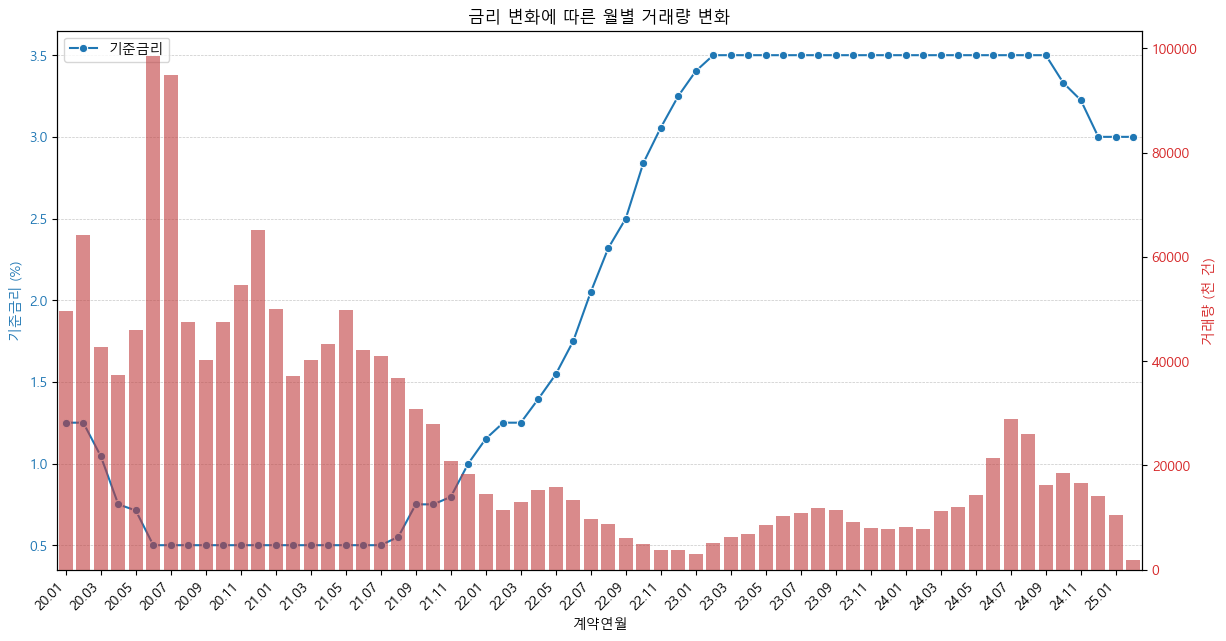

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 로드
df = pd.read_pickle("dataset0222.pkl")

# 📌 금리 변화에 따른 거래량 변화를 더 잘 보이도록 시각화하는 함수 (업데이트)
def visualize_transaction_volume_vs_interest_rate_improved(df):
    """
    금리 변화에 따른 자치구별 거래량 변화를 시각적으로 더 명확하게 표현하는 함수
    (계약연월 포맷 수정: YYYYMM → YY.MM, 기준금리 선 그래프, 거래량 단위 추가, X축 가독성 개선)
    """
    # NaN 제거 및 데이터 선택
    df_filtered = df.dropna(subset=['기준금리', '자치구최근6개월거래량', '계약연월']).copy()

    # 계약연월을 'YYYYMM' → 'YY.MM' 형태로 변환 (예: 202502 → 25.02)
    df_filtered["계약연월"] = df_filtered["계약연월"].astype(str).apply(lambda x: f"{x[2:4]}.{x[4:]}")

    # 계약연월을 기준으로 그룹화하여 평균 기준금리, 총 거래량 계산
    df = df_filtered.groupby('계약연월').agg({
        '기준금리': 'mean',
        '자치구최근6개월거래량': 'sum'
    }).reset_index()

    # 📊 시각화 (막대그래프 + 선 그래프)
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # 기준금리 변화 (선 그래프, 좌측 Y축)
    ax1.set_xlabel("계약연월")
    ax1.set_ylabel("기준금리 (%)", color="tab:blue")
    sns.lineplot(x=df["계약연월"], y=df["기준금리"], color="tab:blue", marker="o", label="기준금리", ax=ax1)
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # 거래량 변화 (막대 그래프, 우측 Y축)
    ax2 = ax1.twinx()
    ax2.set_ylabel("거래량 (천 건)", color="tab:red")
    sns.barplot(x=df["계약연월"], y=df["자치구최근6개월거래량"] / 1000, color="tab:red", alpha=0.6, ax=ax2)  # 단위를 천 단위로 변환
    ax2.tick_params(axis="y", labelcolor="tab:red")

    # 그래프 설정
    plt.title("금리 변화에 따른 월별 거래량 변화")

    # ✅ X축 레이블 조정 (45도 회전 + 중앙 정렬)
    plt.xticks(rotation=45, ha="right")

    # ✅ X축 눈금 간격 조정 (2개월 단위 표시)
    step = 2  # 2개월마다 한 번씩 표시
    xticks = df["계약연월"][::step]  # 2개월 단위로 선택
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(xticks, rotation=45, ha="right")  # X축 라벨 45도 회전

    # 📌 가독성 향상을 위한 격자 추가
    ax1.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

    # 그래프 출력
    plt.show()

# ✅ 시각화 실행
visualize_transaction_volume_vs_interest_rate_improved(df)


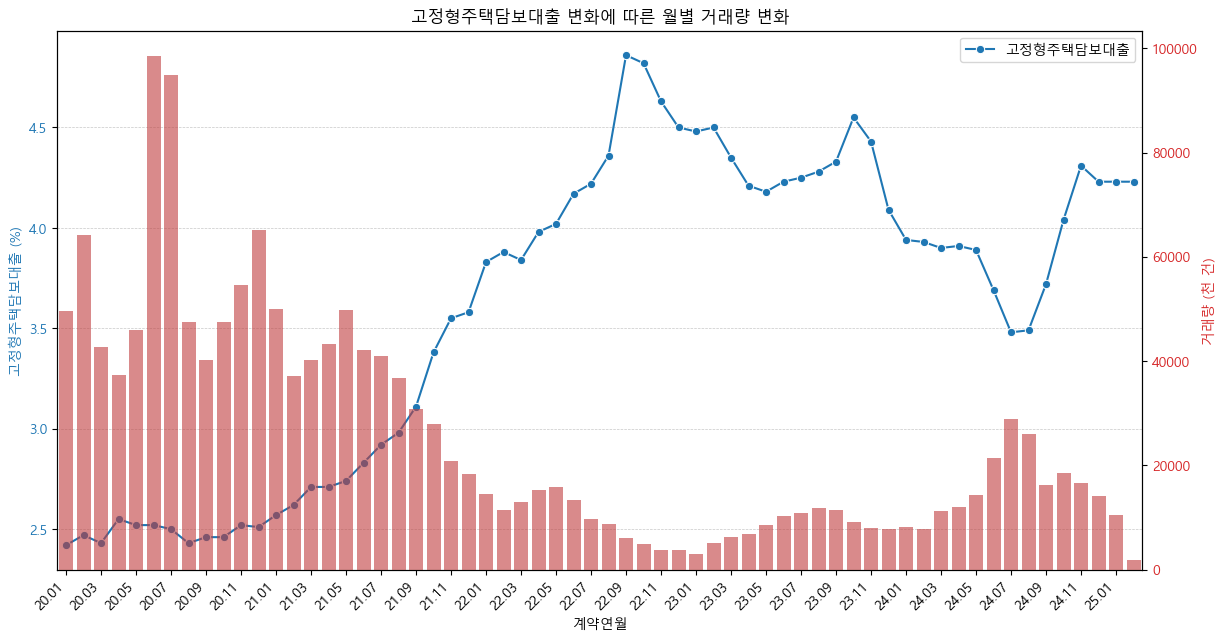

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 로드
df = pd.read_pickle("dataset0222.pkl")

# 📌 고정형주택담보대출 변화에 따른 거래량 변화를 더 잘 보이도록 시각화하는 함수 (업데이트)
def visualize_transaction_volume_vs_loan_rate_improved(df):
    """
    고정형주택담보대출 변화에 따른 자치구별 거래량 변화를 시각적으로 더 명확하게 표현하는 함수
    (계약연월 포맷 수정: YYYYMM → YY.MM, 고정형주택담보대출 선 그래프, 거래량 단위 추가, X축 가독성 개선)
    """
    # NaN 제거 및 데이터 선택
    df_filtered = df.dropna(subset=['고정형주택담보대출', '자치구최근6개월거래량', '계약연월']).copy()

    # 계약연월을 'YYYYMM' → 'YY.MM' 형태로 변환 (예: 202502 → 25.02)
    df_filtered["계약연월"] = df_filtered["계약연월"].astype(str).apply(lambda x: f"{x[2:4]}.{x[4:]}")

    # 계약연월을 기준으로 그룹화하여 평균 고정형주택담보대출, 총 거래량 계산
    df = df_filtered.groupby('계약연월').agg({
        '고정형주택담보대출': 'mean',
        '자치구최근6개월거래량': 'sum'
    }).reset_index()

    # 📊 시각화 (막대그래프 + 선 그래프)
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # 고정형주택담보대출 변화 (선 그래프, 좌측 Y축)
    ax1.set_xlabel("계약연월")
    ax1.set_ylabel("고정형주택담보대출 (%)", color="tab:blue")
    sns.lineplot(x=df["계약연월"], y=df["고정형주택담보대출"], color="tab:blue", marker="o", label="고정형주택담보대출", ax=ax1)
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # 거래량 변화 (막대 그래프, 우측 Y축)
    ax2 = ax1.twinx()
    ax2.set_ylabel("거래량 (천 건)", color="tab:red")
    sns.barplot(x=df["계약연월"], y=df["자치구최근6개월거래량"] / 1000, color="tab:red", alpha=0.6, ax=ax2)  # 단위를 천 단위로 변환
    ax2.tick_params(axis="y", labelcolor="tab:red")

    # 그래프 설정
    plt.title("고정형주택담보대출 변화에 따른 월별 거래량 변화")

    # ✅ X축 레이블 조정 (45도 회전 + 중앙 정렬)
    plt.xticks(rotation=45, ha="right")

    # ✅ X축 눈금 간격 조정 (2개월 단위 표시)
    step = 2  # 2개월마다 한 번씩 표시
    xticks = df["계약연월"][::step]  # 2개월 단위로 선택
    ax1.set_xticks(xticks)
    ax1.set_xticklabels(xticks, rotation=45, ha="right")  # X축 라벨 45도 회전

    # 📌 가독성 향상을 위한 격자 추가
    ax1.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

    # 그래프 출력
    plt.show()

# ✅ 시각화 실행
visualize_transaction_volume_vs_loan_rate_improved(df)


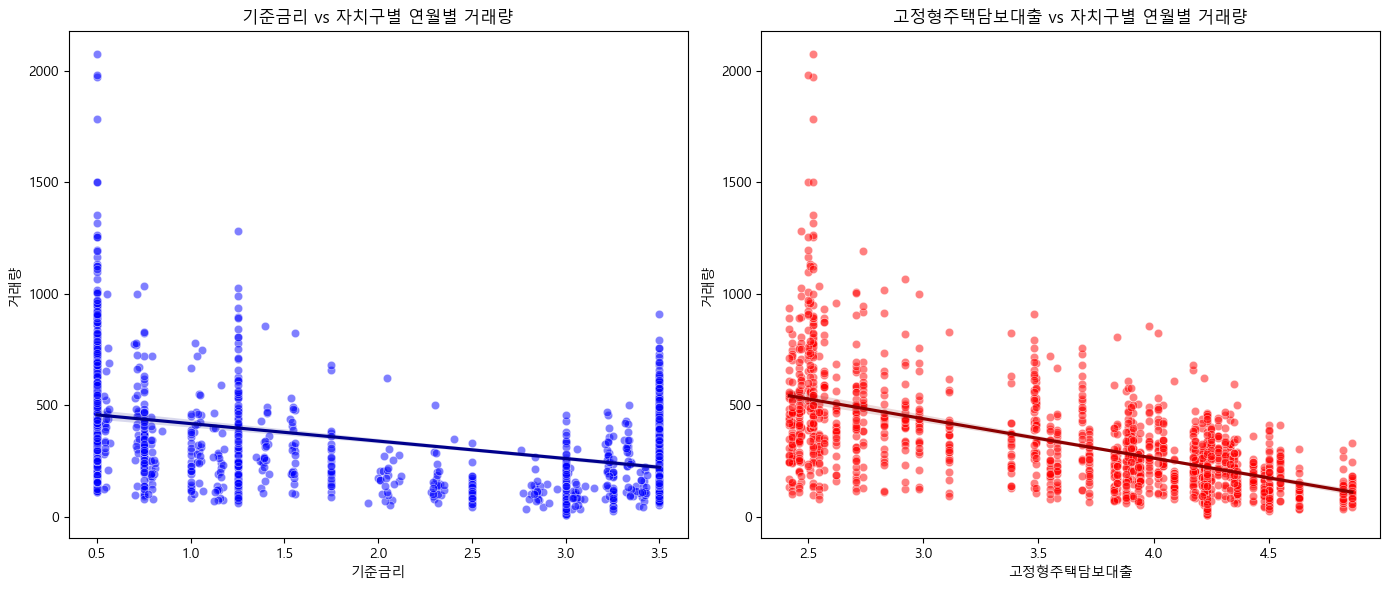

(               계약연월      기준금리  고정형주택담보대출       거래량
 계약연월       1.000000  0.884395   0.756056 -0.420898
 기준금리       0.884395  1.000000   0.808191 -0.430420
 고정형주택담보대출  0.756056  0.808191   1.000000 -0.579952
 거래량       -0.420898 -0.430420  -0.579952  1.000000,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    거래량   R-squared:                       0.341
 Model:                            OLS   Adj. R-squared:                  0.340
 Method:                 Least Squares   F-statistic:                     399.5
 Date:                Thu, 06 Mar 2025   Prob (F-statistic):          1.34e-140
 Time:                        09:51:22   Log-Likelihood:                -10341.
 No. Observations:                1550   AIC:                         2.069e+04
 Df Residuals:                    1547   BIC:                         2.070e+04
 Df Model:                           2           

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
# 저장된 피클 파일 불러오기
pkl_data = "dataset0222.pkl"
df = pd.read_pickle(pkl_data)
def analyze_interest_rate_impact(df):
    """
    기준금리와 고정형주택담보대출이 거래량에 미치는 영향을 비교하는 함수
    - 자치구별 연월별 거래량 기준으로 분석
    """
    # 자치구별 연월별 거래량을 기준으로 데이터 그룹화
    df_grouped = df.groupby(['계약연월', '자치구명']).agg({
        '기준금리': 'mean',
        '고정형주택담보대출': 'mean',
        '실거래가': 'count'  # 거래량을 계약 건수로 정의
    }).reset_index()
    
    # 컬럼명 변경 (거래량)
    df_grouped.rename(columns={'실거래가': '거래량'}, inplace=True)
    
    # 숫자형 데이터만 선택하여 상관 분석 수행
    df_numeric = df_grouped[['계약연월', '기준금리', '고정형주택담보대출', '거래량']]
    
    # 데이터 샘플링 (최대 10,000개로 제한)
    df_sampled = df_numeric.sample(n=min(10000, len(df_numeric)), random_state=42)
    
    # 독립 변수 (X)와 종속 변수 (y) 설정
    X = df_sampled[['기준금리', '고정형주택담보대출']]
    y = df_sampled['거래량']
    
    # 상수 추가 (회귀 분석을 위해)
    X = sm.add_constant(X)
    
    # 회귀 분석 실행
    model = sm.OLS(y, X).fit()
    regression_summary = model.summary()
    
    # 상관 분석
    correlation_matrix = df_sampled.corr()
    
    # 시각화 - 기준금리 vs 거래량, 고정형주택담보대출 vs 거래량
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # 기준금리 vs 거래량
    sns.scatterplot(x=df_sampled['기준금리'], y=df_sampled['거래량'], ax=axes[0], color='blue', alpha=0.5)
    sns.regplot(x=df_sampled['기준금리'], y=df_sampled['거래량'], ax=axes[0], scatter=False, color='darkblue')
    axes[0].set_title("기준금리 vs 자치구별 연월별 거래량")
    
    # 고정형주택담보대출 vs 거래량
    sns.scatterplot(x=df_sampled['고정형주택담보대출'], y=df_sampled['거래량'], ax=axes[1], color='red', alpha=0.5)
    sns.regplot(x=df_sampled['고정형주택담보대출'], y=df_sampled['거래량'], ax=axes[1], scatter=False, color='darkred')
    axes[1].set_title("고정형주택담보대출 vs 자치구별 연월별 거래량")
    
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix, regression_summary

analyze_interest_rate_impact(df)

                            OLS Regression Results                            
Dep. Variable:                   거래건수   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     74.04
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           2.72e-18
Time:                        09:51:23   Log-Likelihood:                -697.50
No. Observations:                  76   AIC:                             1401.
Df Residuals:                      73   BIC:                             1408.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.494e+04   1632.390     15.276      0.0

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16380\39690173.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_analysis['계약연월'], rotation=45)


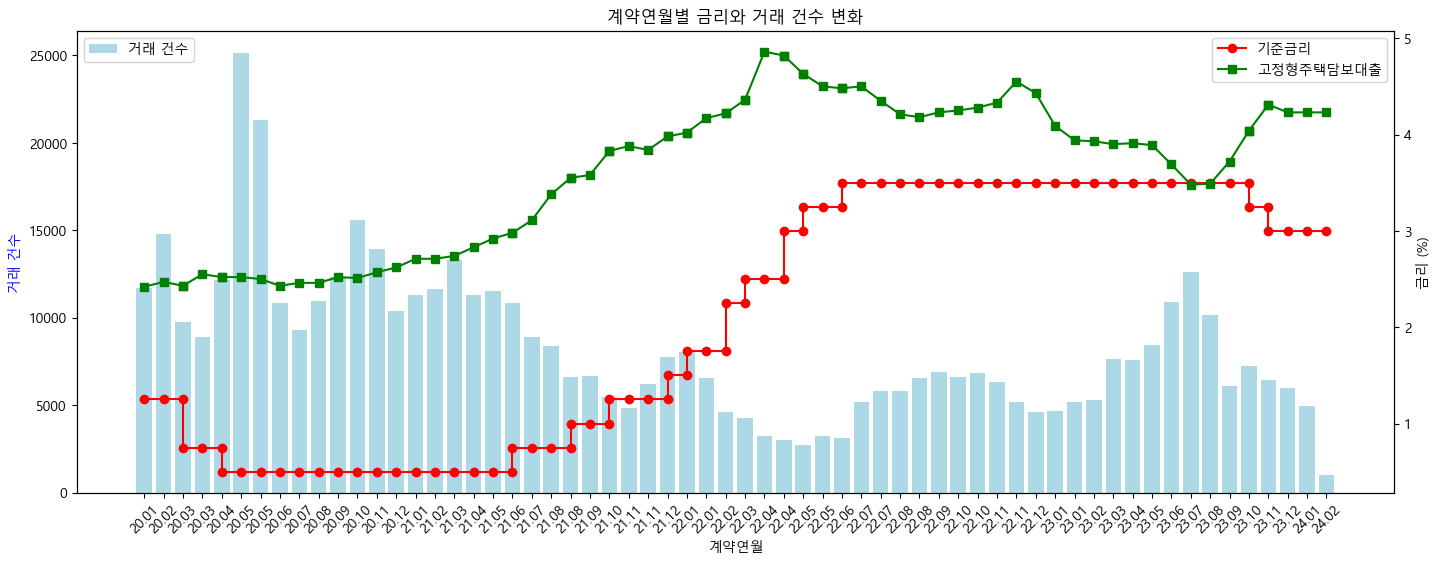

In [19]:
import os
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 파일 경로 설정
file_path = "dataset0222.pkl"

# 데이터 불러오기
df = pd.read_pickle(file_path)

# 계약연월별 거래 건수 집계
df['계약연월'] = df['계약일'].dt.to_period('M')
df_grouped = df.groupby('계약연월').size().reset_index(name='거래건수')

# 금리 데이터 처리
df['계약연월'] = df['계약연월'].astype(str)  # 문자열 변환

# 계약연월 형식 변경 (20.01 형식으로 변환)
df_grouped['계약연월'] = df_grouped['계약연월'].astype(str).str[2:].str.replace('-', '.')
df['계약연월'] = df['계약연월'].astype(str).str[2:].str.replace('-', '.')

# 금리 데이터 추가
df_grouped = df_grouped.merge(df[['계약연월', '기준금리', '고정형주택담보대출']].drop_duplicates(), on='계약연월', how='left')

# 분석할 변수 선택
df_analysis = df_grouped.dropna()

# 독립 변수 (기준금리, 고정형주택담보대출)
X = df_analysis[['기준금리', '고정형주택담보대출']]
X = sm.add_constant(X)  # 절편 추가

# 종속 변수 (거래 건수)
y = df_analysis['거래건수']

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

# 시각화
fig, ax1 = plt.subplots(figsize=(17, 6))
ax2 = ax1.twinx()
ax1.bar(df_analysis['계약연월'], df_analysis['거래건수'], color='lightblue', label='거래 건수')
ax2.plot(df_analysis['계약연월'], df_analysis['기준금리'], color='red', marker='o', label='기준금리')
ax2.plot(df_analysis['계약연월'], df_analysis['고정형주택담보대출'], color='green', marker='s', label='고정형주택담보대출')

ax1.set_xlabel('계약연월')
ax1.set_ylabel('거래 건수', color='blue')
ax2.set_ylabel('금리 (%)', color='black')
ax1.set_xticklabels(df_analysis['계약연월'], rotation=45)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('계약연월별 금리와 거래 건수 변화')
plt.show()


In [20]:
import os
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# 파일 경로 설정
file_path = "dataset0222.pkl"

# 데이터 불러오기
df = pd.read_pickle(file_path)

# 계약연월별 거래 건수 집계
df['계약연월'] = df['계약일'].dt.to_period('M')
df_grouped = df.groupby('계약연월').size().reset_index(name='거래건수')

# 금리 데이터 처리
df['계약연월'] = df['계약연월'].astype(str)  # 문자열 변환

# 계약연월 형식 변경 (20.01 형식으로 변환)
df_grouped['계약연월'] = df_grouped['계약연월'].astype(str).str[2:].str.replace('-', '.')
df['계약연월'] = df['계약연월'].astype(str).str[2:].str.replace('-', '.')

# 금리 데이터 추가
df_grouped = df_grouped.merge(df[['계약연월', '기준금리', '고정형주택담보대출']].drop_duplicates(), on='계약연월', how='left')

# 분석할 변수 선택
df_analysis = df_grouped.dropna()

# 회귀 모델 적합
def fit_regression_model(df):
    """ 회귀 분석을 수행하고 결과를 반환하는 함수 """
    X = df[['기준금리', '고정형주택담보대출']]
    X = sm.add_constant(X)  # 절편 추가
    y = df['거래건수']
    model = sm.OLS(y, X).fit()
    return model


def analyze_impact_of_mortgage_rate(model):
    """ 고정형 주택담보대출 금리가 거래량에 미치는 영향을 분석하는 함수 """
    coef_mortgage = model.params['고정형주택담보대출']
    p_value_mortgage = model.pvalues['고정형주택담보대출']
    
    print(f"고정형 주택담보대출 금리의 회귀 계수: {coef_mortgage:.4f}")
    print(f"고정형 주택담보대출 금리의 정확한 p-value: {p_value_mortgage:.10e}")
    
    if p_value_mortgage < 0.05:
        print("고정형 주택담보대출 금리는 통계적으로 유의미하게 거래량에 영향을 미칩니다.")
        if coef_mortgage < 0:
            print(f"고정형 주택담보대출 금리가 1% 증가할 때, 거래량이 평균적으로 {-coef_mortgage:.2f}건 감소하는 경향이 있습니다.")
        else:
            print(f"고정형 주택담보대출 금리가 1% 증가할 때, 거래량이 평균적으로 {coef_mortgage:.2f}건 증가하는 경향이 있습니다.")
    else:
        print("고정형 주택담보대출 금리는 거래량에 통계적으로 유의미한 영향을 미치지 않습니다.")


# 상관계수 계산
def calculate_correlation(df):
    """ 고정형 주택담보대출 금리와 거래 건수의 상관계수를 계산하는 함수 """
    correlation = df[['거래건수', '고정형주택담보대출']].corr().iloc[0, 1]
    print(f"고정형 주택담보대출 금리와 거래 건수의 상관계수: {correlation:.4f}")
    return correlation


# 회귀 계수 vs 상관계수 비교 시각화
def plot_coefficients_vs_correlation(model, correlation):
    """ 회귀 계수와 상관계수를 비교하는 시각화 """
    coefs = model.params[1:]
    labels = ['기준금리', '고정형주택담보대출']
    
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(labels, coefs, color=['red', 'green'], label='회귀 계수')
    ax.axhline(y=correlation * max(abs(coefs)), color='blue', linestyle='--', label='상관계수 기준')
    
    ax.set_ylabel('값')
    ax.set_title('회귀 계수 vs 상관계수')
    ax.legend()
    plt.show()


def plot_trends(df):
    """ 계약연월별 거래 건수와 금리 변화를 시각화하는 함수 """
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax2 = ax1.twinx()
    ax1.bar(df['계약연월'], df['거래건수'], color='lightblue', label='거래 건수')
    ax2.plot(df['계약연월'], df['기준금리'], color='red', marker='o', label='기준금리')
    ax2.plot(df['계약연월'], df['고정형주택담보대출'], color='green', marker='s', label='고정형주택담보대출')
    
    ax1.set_xlabel('계약연월')
    ax1.set_ylabel('거래 건수 (건)', color='blue')
    ax2.set_ylabel('금리 (%)', color='black')
    ax1.set_xticklabels(df['계약연월'], rotation=45)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title('계약연월별 금리와 거래 건수 변화')
    plt.show()



In [21]:
# 회귀 모델 적합
model = fit_regression_model(df_analysis)

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   거래건수   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     74.04
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           2.72e-18
Time:                        09:51:24   Log-Likelihood:                -697.50
No. Observations:                  76   AIC:                             1401.
Df Residuals:                      73   BIC:                             1408.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.494e+04   1632.390     15.276      0.0

In [22]:
# 분석 실행
analyze_impact_of_mortgage_rate(model)

고정형 주택담보대출 금리의 회귀 계수: -4887.5789
고정형 주택담보대출 금리의 정확한 p-value: 2.5585616583e-12
고정형 주택담보대출 금리는 통계적으로 유의미하게 거래량에 영향을 미칩니다.
고정형 주택담보대출 금리가 1% 증가할 때, 거래량이 평균적으로 4887.58건 감소하는 경향이 있습니다.


In [23]:
# 상관계수 출력
correlation = calculate_correlation(df_analysis)

고정형 주택담보대출 금리와 거래 건수의 상관계수: -0.8142


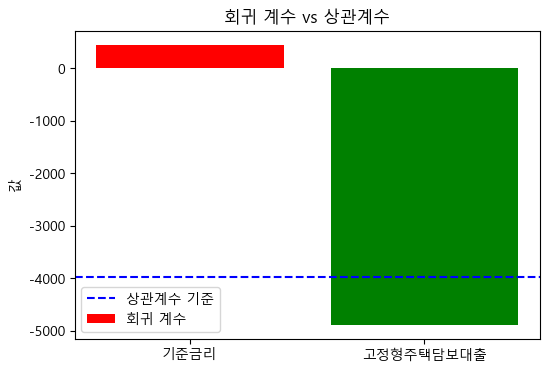

In [24]:
# 회귀 계수 vs 상관계수 비교 시각화
plot_coefficients_vs_correlation(model, correlation)

1. 회귀 계수(Regression Coefficient)
✔ 의미:

회귀 분석은 고정형 주택담보대출 금리가 거래 건수에 독립적으로 미치는 영향을 분석하는 방법입니다.
다른 변수(예: 기준금리)의 영향을 통제한 상태에서 특정 변수(고정형 주택담보대출 금리)의 영향을 측정할 수 있습니다.
즉, **"고정형 주택담보대출 금리가 1% 증가하면 거래량이 얼마나 변하는지"**를 수치로 알려줍니다.
✔ 장점:

다중 변수 간 관계를 고려할 수 있음 → 기준금리 등의 영향을 배제한 순수한 영향 분석 가능
인과 관계를 추론할 수 있음 → 단순히 관계가 아니라, 실제 영향을 분석할 때 유용함
✔ 단점:

다중공선성(변수들 간 높은 상관관계)이 있으면 회귀 계수가 왜곡될 수 있음
모델이 잘못 설정되거나 중요한 변수를 누락하면 잘못된 결론을 도출할 가능성이 있음


In [26]:
# 분석할 변수 선택
df_analysis = df_grouped.dropna()

def fit_regression_model(df):
    """ 회귀 분석을 수행하고 결과를 반환하는 함수 """
    X = df[['기준금리', '고정형주택담보대출']]
    X = sm.add_constant(X)  # 절편 추가
    y = df['거래건수']
    model = sm.OLS(y, X).fit()
    return model

# 회귀 모델 적합
model = fit_regression_model(df_analysis)

# 결과 출력
print(model.summary())

def analyze_impact_of_mortgage_rate(model):
    """ 고정형 주택담보대출 금리가 거래량에 미치는 영향을 분석하는 함수 """
    coef_mortgage = model.params['고정형주택담보대출']
    p_value_mortgage = model.pvalues['고정형주택담보대출']
    
    print(f"고정형 주택담보대출 금리의 회귀 계수: {coef_mortgage:.4f}")
    print(f"고정형 주택담보대출 금리의 정확한 p-value: {p_value_mortgage:.10e}")
    
    if p_value_mortgage < 0.05:
        print("고정형 주택담보대출 금리는 통계적으로 유의미하게 거래량에 영향을 미칩니다.")
        if coef_mortgage < 0:
            print(f"고정형 주택담보대출 금리가 1% 증가할 때, 거래량이 평균적으로 {-coef_mortgage:.2f}건 감소하는 경향이 있습니다.")
        else:
            print(f"고정형 주택담보대출 금리가 1% 증가할 때, 거래량이 평균적으로 {coef_mortgage:.2f}건 증가하는 경향이 있습니다.")
    else:
        print("고정형 주택담보대출 금리는 거래량에 통계적으로 유의미한 영향을 미치지 않습니다.")

# 분석 실행
analyze_impact_of_mortgage_rate(model)

# 상관계수 계산
def calculate_correlation(df, col):
    """ 특정 변수와 거래 건수의 상관계수를 계산하는 함수 """
    correlation = df[['거래건수', col]].corr().iloc[0, 1]
    print(f"{col}과 거래 건수의 상관계수: {correlation:.4f}")
    return correlation

# 기준금리와 고정형주택담보대출 각각의 상관계수 계산
correlation_base_rate = calculate_correlation(df_analysis, '기준금리')
correlation_mortgage = calculate_correlation(df_analysis, '고정형주택담보대출')

def compare_correlations(correlation_base_rate, correlation_mortgage):
    """ 기준금리와 고정형주택담보대출의 상관계수를 비교하여 더 유의미한 변수를 결정하는 함수 """
    print("\n🔍 상관계수 비교 결과:")
    if abs(correlation_mortgage) > abs(correlation_base_rate):
        print("고정형 주택담보대출 금리가 거래량과 더 높은 상관관계를 가집니다.")
    else:
        print("기준금리가 거래량과 더 높은 상관관계를 가집니다.")

# 상관계수 비교 실행
compare_correlations(correlation_base_rate, correlation_mortgage)


                            OLS Regression Results                            
Dep. Variable:                   거래건수   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     74.04
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           2.72e-18
Time:                        09:51:24   Log-Likelihood:                -697.50
No. Observations:                  76   AIC:                             1401.
Df Residuals:                      73   BIC:                             1408.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.494e+04   1632.390     15.276      0.0

- 📉 기준금리보다는 고정형 주택담보대출 금리가 거래량 감소에 더 큰 영향을 미친다.
- 📊 즉, 기준금리가 오르는 것보다 대출 금리(실제 적용 금리)가 오를 때 거래량이 훨씬 더 많이 줄어드는 현상이 확인됨.
- 🔍 부동산 시장 예측 시, 단순히 기준금리를 보는 것이 아니라 실제 적용되는 대출 금리 변화를 분석하는 것이 더 중요함. 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 📌 데이터 로드 및 전처리 함수
def load_and_preprocess_data(filepath):
    df = pd.read_pickle(filepath)
    df_filtered = df.dropna(subset=['고정형주택담보대출', '자치구최근6개월거래량', '계약연월']).copy()

    # 계약연월을 'YYYYMM' → 'YY.MM' 형태로 변환 (예: 202502 → 25.02)
    df_filtered["계약연월"] = df_filtered["계약연월"].astype(str).apply(lambda x: f"{x[2:4]}.{x[4:]}")

    # 그룹화하여 월별 평균 금리, 총 거래량 계산
    df_grouped = df_filtered.groupby('계약연월').agg({
        '고정형주택담보대출': 'mean',
        '자치구최근6개월거래량': 'sum'
    }).reset_index()

    return df_grouped

# 📌 상관분석 함수
def correlation_analysis(df_grouped):
    correlation, p_value = pearsonr(df_grouped["고정형주택담보대출"], df_grouped["자치구최근6개월거래량"])
    print(f"📊 피어슨 상관계수: {correlation:.4f}")
    print(f"📌 P-value: {p_value:.4f}")

    # 📊 상관관계 시각화
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_grouped["고정형주택담보대출"], y=df_grouped["자치구최근6개월거래량"])
    plt.title("고정형 주택담보대출 이자율과 거래량의 관계")
    plt.xlabel("고정형 주택담보대출 이자율 (%)")
    plt.ylabel("거래량")
    plt.grid(True)
    plt.show()

# 📌 단순 선형 회귀분석 함수
def simple_linear_regression(df_grouped):
    X = df_grouped["고정형주택담보대출"].values.reshape(-1, 1)
    y = df_grouped["자치구최근6개월거래량"].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, y)

    a = model.coef_[0][0]
    b = model.intercept_[0]
    print(f"📈 회귀식: 거래량 = {a:.2f} * 고정형주택담보대출 + {b:.2f}")

    y_pred = model.predict(X)

    # 📊 회귀선 시각화
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_grouped["고정형주택담보대출"], y=df_grouped["자치구최근6개월거래량"], label="실제값")
    plt.plot(df_grouped["고정형주택담보대출"], y_pred, color="red", label="회귀선")
    plt.title("고정형 주택담보대출과 6개월거래량 회귀 분석")
    plt.xlabel("고정형 주택담보대출 이자율 (%)")
    plt.ylabel("거래량")
    plt.legend()
    plt.grid(True)
    plt.show()

df_grouped = load_and_preprocess_data("dataset0222.pkl")

📈 회귀식: 거래량 = -24472967.33 * 고정형주택담보대출 + 113263181.31


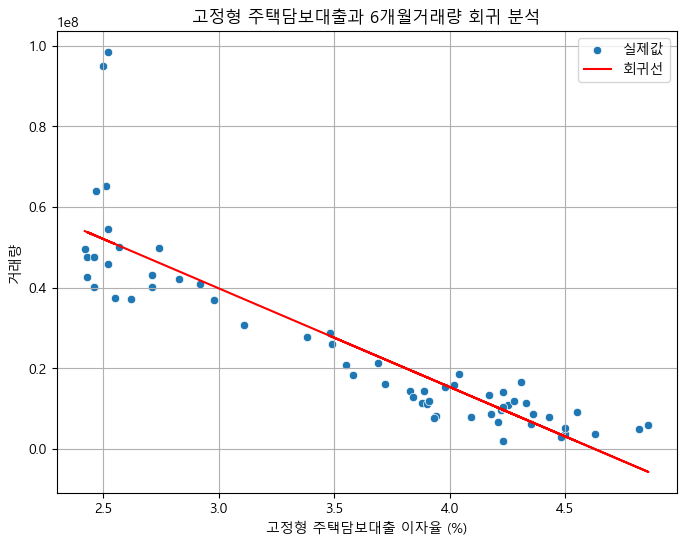

In [29]:
simple_linear_regression(df_grouped)